In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import img_to_array

In [2]:
gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.3,
                         shear_range=0.4, horizontal_flip=True)

In [3]:
img_array_list = []
img_names = ['data/dog1.jpg', 'data/dog2.jpg',
             'data/cat1.jpg', 'data/cat2.jpg']

In [4]:
for i in range(len(img_names)):
    loaded_img = load_img(img_names[i], target_size=(100, 100))
    loaded_img_array = img_to_array(loaded_img) / 255.0
    img_array_list.append(loaded_img_array)

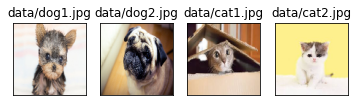

In [5]:
# 이미지 확인하기
plt.figure(figsize=(6, 6))
for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [6]:
# 이미지 변경하기
batch_size = 4
data_gen = gen.flow(np.array(img_array_list), batch_size=batch_size)
img = data_gen.next()

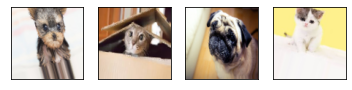

In [7]:
# 변경된 이미지 확인하기
plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

In [8]:
gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.3,
                         shear_range=0.3, rescale=1./255)
data_path = 'data/test_dir/'
batch_size = 12
data_gen = gen.flow_from_directory(directory=data_path, batch_size=batch_size,
                                   shuffle=True, target_size=(100, 100),
                                   class_mode='categorical')
img, label = data_gen.next()

Found 12 images belonging to 3 classes.


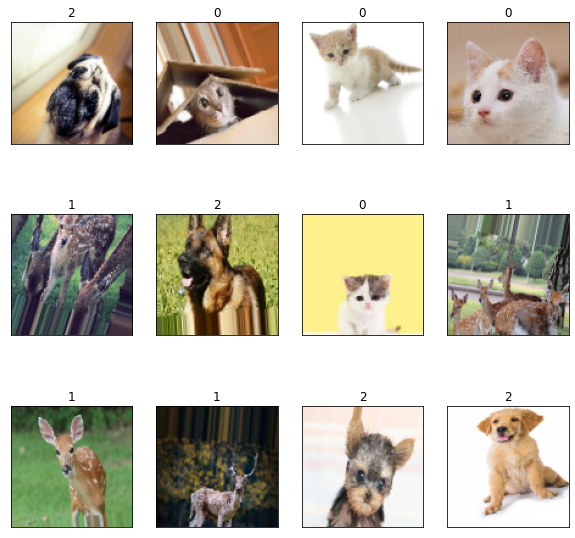

In [9]:
plt.figure(figsize=(10, 10))
for i in range(len(img)):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])